In [1]:
import tensorflow as tf 
import numpy as np

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0, 100, (5, 5))

In [4]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [5]:
rand_b = np.random.uniform(0, 100, (5, 1))

In [6]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [8]:
add_op = a + b
mul_op = a * b

In [9]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op, feed_dict = {a : 10, b : 20})
    print(add_result)

30.0


# Example Neural Network

In [10]:
n_features = 10
n_dense_neurons = 3

In [11]:
x = tf.placeholder(tf.float32, shape = (None, n_features))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones(n_dense_neurons))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
z = tf.matmul(x, W) + b 
a = tf.sigmoid(z)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    
    sess.run(init)
    layer_out = sess.run(a, feed_dict = {x: np.random.random([1, n_features])})

In [15]:
layer_out

array([[0.19592889, 0.8423014 , 0.36188066]], dtype=float32)

# Linear Reggression with made up data 

In [16]:
X_train = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
X_train = X_train.reshape(X_train.shape[0], 1)

In [17]:
X_train

array([[-1.20856056],
       [-0.08034641],
       [ 2.82674411],
       [ 4.50477294],
       [ 3.42312535],
       [ 4.88227319],
       [ 7.18414126],
       [ 6.77068715],
       [ 9.4930023 ],
       [ 9.96290567]])

In [18]:
Y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
Y_label = Y_label.reshape(Y_label.shape[0], 1)

In [19]:
Y_label

array([[0.5420333 ],
       [1.17575569],
       [0.85241231],
       [2.50514314],
       [4.67005971],
       [4.41685654],
       [6.66701681],
       [6.69180648],
       [7.54731409],
       [9.03483077]])

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline

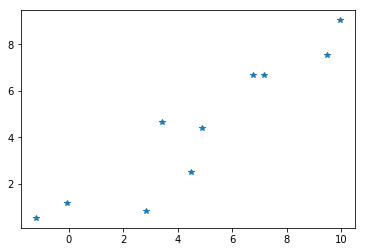

In [21]:
plt.plot(X_train, Y_label, "*")

In [22]:
X = tf.placeholder(tf.float32, shape=(10, None))
Y = tf.placeholder(tf.float32, shape=(10, None))

In [23]:
w = tf.get_variable(name="w", shape=(1,1), initializer = tf.contrib.layers.xavier_initializer(seed = 1))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [24]:
b = tf.get_variable(name="b", shape=(1,1), initializer = tf.zeros_initializer())

In [25]:
error = np.sum((w * X + b - Y) ** 2)

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [27]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    
    sess.run(init)
    
    epochs = 10000
    for i in range(epochs):
        sess.run(train, feed_dict={X: X_train, Y: Y_label})
    
    final_slope, final_bias = sess.run([w, b])

In [37]:
final_slope, final_bias

(array([[0.763661]], dtype=float32), array([[0.7631724]], dtype=float32))

In [38]:
x_test = np.linspace(-1, 11, 10)
x_test = x_test.reshape(x_test.shape[0], 1)

y_pred = x_test * final_slope + final_bias

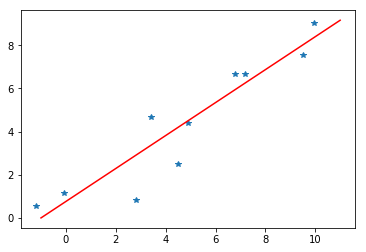

In [39]:
plt.plot(X_train, Y_label, "*")
plt.plot(x_test, y_pred, "r")